### Classification base on the source of the password

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')
data=pd.read_csv('final.csv')
data2=pd.read_csv('final.csv')
data2.head()
data=data.drop(['Unnamed: 0'],axis=1)
data.head()

,Passwords,length,Has_Upper,Has_Numeric,Has_SpecialChar,UpperCase_Count,LowerCase_Count,Numeric_Count,SpecialChar_Count,Alphabet_Count,Password_Source,Has_Word,Has_Name,Has_Place,Score,Password_Strength
0,@fl!pm0de@,10,0,1,1,0,6,1,3,6,Yahoo,0,0,0,5,Strong
1,pass,4,0,0,0,0,4,0,0,4,Yahoo,0,0,1,1,Weak
2,steveol,7,0,0,0,0,7,0,0,7,Yahoo,0,1,0,2,Weak
3,chotzi,6,0,0,0,0,6,0,0,6,Yahoo,0,1,0,1,Weak
4,lb2512,6,0,1,0,0,2,4,0,2,Yahoo,0,0,0,3,Medium


In [2]:
data3=data2.groupby('Password_Source')['Passwords'].count().reset_index()
data3

,Password_Source,Passwords
0,Hotmail,9812
1,Netflix,1832
2,Yahoo,442838


### Distribution od different classes in the Password_Source

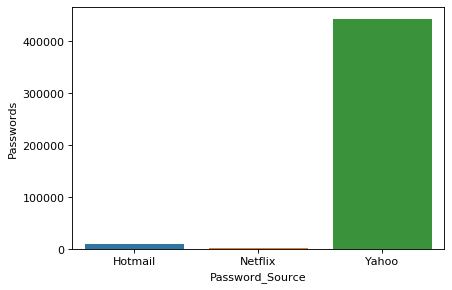

In [3]:
plt.figure(num=None, figsize=(6, 4), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x='Password_Source', y='Passwords', data=data3, estimator=np.median)
plt.show()

### There is a great variation in the distribution of classes

### label encoding the Passwords

In [4]:
from sklearn.preprocessing import LabelEncoder

number = LabelEncoder()
data['Passwords'] = number.fit_transform(data['Passwords'].astype('str'))



In [5]:
X=data.drop(['Password_Source','Password_Strength'],axis=1)

Y=data.Password_Source

In [6]:
aux_df = data[['Password_Source']].drop_duplicates().sort_values('Password_Source')

### Splitting the data in to training and test set

In [7]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3)

### Random Forest Classification at max_depth 10, 30

In [8]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=10)
rf1 = RandomForestClassifier(max_depth=30)
rf1.fit(xtrain, ytrain)
rf.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Accuracy at depth 10 and 30

In [9]:
from sklearn.metrics import accuracy_score
print('Accuracy for random forest1: ', 100 * accuracy_score(ytest, rf1.predict(xtest)), '%')
print('Accuracy for random forest2: ', 100 * accuracy_score(ytest, rf.predict(xtest)), '%')

Accuracy for random forest1:  96.62033811287543 %
Accuracy for random forest2:  97.46452015108731 %


#### Acheived the accurac of 96% which is pretty good

### Classification Report for max_depth 10

In [10]:
print("Classification report")
print(classification_report(ytest, rf.predict(xtest)))

Classification report
              precision    recall  f1-score   support

     Hotmail       0.69      0.02      0.04      2943
     Netflix       0.00      0.00      0.00       546
       Yahoo       0.97      1.00      0.99    132856

   micro avg       0.97      0.97      0.97    136345
   macro avg       0.55      0.34      0.34    136345
weighted avg       0.96      0.97      0.96    136345



#### If we observe the Classification report , even if the accuracy is high the f1_score is very low for Hotmail and Netflix. This is because of the imbalance in the dataset .

### Confusion matrix at max_depth 10

In [11]:
results = confusion_matrix(ytest, rf.predict(xtest))
print(results)

[[    59      0   2884]
 [     0      0    546]
 [    27      0 132829]]


Text(0.5, 24.0, 'truth')

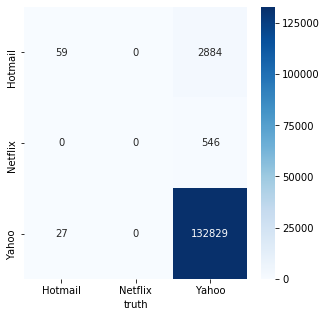

In [13]:
plt.figure(figsize=(5,5))
sns.heatmap(results,annot=True,fmt="d",
            xticklabels=aux_df['Password_Source'].values, 
            yticklabels=aux_df['Password_Source'].values,
            cmap="Blues")
plt.xlabel('Predicted')
plt.xlabel('truth')

### Classification report max_depth 30

In [14]:
print("Classification report")
print(classification_report(ytest, rf1.predict(xtest)))

Classification report
              precision    recall  f1-score   support

     Hotmail       0.22      0.15      0.18      2943
     Netflix       0.52      0.53      0.52       546
       Yahoo       0.98      0.99      0.98    132856

   micro avg       0.97      0.97      0.97    136345
   macro avg       0.57      0.55      0.56    136345
weighted avg       0.96      0.97      0.96    136345



### Confusion matrix for max_depth 30

Text(0.5, 24.0, 'truth')

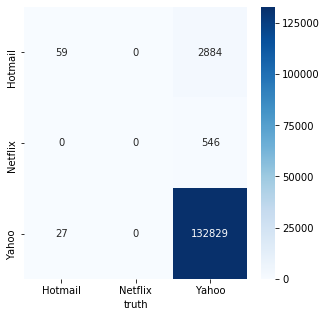

In [15]:
plt.figure(figsize=(5,5))
sns.heatmap(results,annot=True,fmt="d",
            xticklabels=aux_df['Password_Source'].values, 
            yticklabels=aux_df['Password_Source'].values,
            cmap="Blues")
plt.xlabel('Predicted')
plt.xlabel('truth')

### Here what we can observe is that although the acuuracy is about 97 percent the f1 score is very low for hotmail and netflix because of the imbalace in the dataset . As there is an imbalance in the dataset we have choosen to sample the dataset.